## Autophagy, cell death, and lysosomes 
### Introduction  
#### April 1, 2020
- **Briefly**<br>
Autophagy is the process that delivers intracellular components to lysosomes for degradation. This process can promote or inhibit cell death. The latter occurs because it's degrading components that can be used as an energy source in case of stavation."*Much of this interest has been driven by the fact that manipulation of autophagy holds great promise for improving treatment of diverse diseases.*" Micoroautophagy, macroautophagy and chaperon mediated autophagy are all different autophagic mechanisms that are mediated by lysosomes (i.e. they rely on lysosomes to degrade the components they hold or sequester).<br>
**Cell death can be in many forms:** <br>
* Extrinsic apoptosis  
* Caspase dependent  
* Caspase independent intrinsic apoptosis (mitochondrial).
* Regulated necrosis  
* Autophagic   
* Mitotic catastrophic <br>
As for apoptotic cell death(programmed cell death), which is important in normal development and is an essential mechanism to remove damaged or dangerous cells, it's important to know that many signals trigger apoptosis(mitochondrial , golgi apparatus, and lysosomal).<br>
**Lysosomal cell death is divided into:**
- Necrotic LCD 
- Autophagic LCD 
- Apoptotic LCD <br>
Lysosomal membrane permeabilization is can predict which kind of cell death is taking place (e.g. partial selective permeabilization triggers apoptosis, while complete breakdown of an organelle cn occur in unregulated necrosis).
As we have seen from the very little information provided above, all the three phases (autophagy, cell death, and lysosome) are highly overlapped and studying a gene/protein involved in one phase can mean that this gene/protein is also involved in the other phase.<br>
Therefore, **one of the aims** of this project is to gather information about the genes related to autophagy, cell, and lysosomes and find the overlap between them in order to understand their mechanisms better. <br>
### Meeting with Sonja
**Tasks:**<br>
1. Write a script to automatically download all the databases.
2. Write a script to extract the information from the databases automatically. (Doesn’t matter the format to be downloaded). To get gene IDs, gene names and their synonyms if available, Uniprot ID if available, protein names.<br>
3. Above steps can be mixed together.<br>
4. Next step is to merge entries whereby those who do not have uniprot IDs will be assigned to one (take into account that some genes (microRNA genes) are not protein encoding so they won’t have uniprot IDs).<br>
5. Then we will have a list of genes that will be classified according how they are reported in different databases. e.g. lamp1 reported to be in lysosomes in “this database”, or reported to be important in cell death in “this database”..etc.<br>
6. One complicated thing that could be added is to find the homologs in different species. e.g. one database reported galactin3 in humans and another reported it in yeast. This could be part of the functional annotation.<br>
7. At the end we will have a list of genes that are known have relation to ACL. We can look at the overlap between all of them and compare our results to the text mining results.<br>

8. They tried to knock down some genes and see the effect on cell count (if they become less then they most probably died). There’s a list of these genes (hits/screens) already. So when I get the database tables we can see how many genes of these lists are already reported to be involved in lysosomes, cell death, or autophagy. We want to see also which genes that are regulating cells are dying but not dead yet.<br>

9. We don’t have data for what is dying.<br>
10. I will look at the genes that we know are dead, and relate if they have something to do with lysosomes.<br>
11. Final step is to do pathway analysis, what type of genes are interacting with each other (draw pathway). <br><br>
***IN SUMMARY***<br>
1. First step is to get information from databases.
2. Second step is to compare the screens to the genes list I got. Cell profiler can be used in this step to compare the images results for the cells that are dying(after getting Malou’s results).
3. Do pathway analysis (e.g. 14 genes are interacting with each other so they may form a pathway).<br>


### April 2-8, 2020
### Tasks:
- Learn how to use packages for downloading **zipped, gzipped, tar files as well as csv tables.**<br>
- Write codes to download databases.<br>
- Learn how to use jupyter notebook and jupyter markdown.<br>


#### **Downloading The Autophagy Database**

In [ ]:
import tarfile
import wget
import gzip
import zipfile
from zipfile import ZipFile
import csv
import pandas as pd
from owlready2 import *
import goatools
from goatools.obo_parser import GODag

#Downloading .tar.gz files from "The Autophagy database". It requires wget and tarfile libraries.
#save the url of the file to a variable
url = "http://www.tanpaku.org/autophagy/download/autophagyDB.tar.gz"
#download with wget and use the name of the file with its extension
wget.download(url,'autophagyDB.tar.gz')
#Tarfile by default does not treat the file as gzipped so give it the r:gz mode. then open the folder.Here I do not specify 'rb' because it's a folder.
AutophagyDB= tarfile.open('autophagyDB.tar.gz', "r:gz")
#extract the content
AutophagyDB.extractall()
AutophagyDB.close()
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_Autophagy_database

#### **Downloading The Gene Ontology Database**

In [ ]:
#Downloading go.owl. This requires owlready2 library
#specify the directory you want to append the file to
onto_path.append('/Volumes/LaCie/MasterThesis2020/jupTest')
go_onto = get_ontology("http://purl.obolibrary.org/obo/go.owl").load()
#save the file 
go_onto.save()
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_GO_Resource_database

In [ ]:
#Downloading go-basic-obo. This requires goatools library and need to import GODag
url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
wget.download(url,'go-basic.obo')
go_obo = goatools.obo_parser.GODag('go-basic.obo')
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_GO_Resource_database

### NOTE:<br> 
On the 7th of april, Sonja told me to try parse the gene ontology database by searching in the html file downloaded for specific GO terms concerning autophagy, cell death and lysosomes and get the list of genes for that. So I might not use the following files but I will keep them anyways. <br>
**The following codes are used to download and gunzip gene annotation files for 6 species whereby homo sapiens has 4 different files (protein, isoform,complex, rna).** <br>



In [ ]:
#These files require wget and gzip libraries
#I downloaded these files already using Atom and copied them to jupyter notebook.
#Downloading .gz files from "The Gene Ontology Database"
#Homo sapiens protein**
url = 'http://geneontology.org/gene-associations/goa_human.gaf.gz'
wget.download(url, 'goa_human.gaf.gz')
#specify s reading mode for the file (read binary). Two files will be downloaded .gaf.gz and .gaf (i can name them whatever I want)
Go_human = gzip.open('goa_human.gaf.gz', 'rb')
#better to close to reduce the computational load.
Go_annotation_human = Go_human.read()
Go_human.close()
#Now we write  the file to another file (gunzipped because I gunzipped it at earlier steps). I specify the wb because it's binary
output = open('goa_human.gaf', 'wb')
# I write the read file into the output file.
output.write(Go_annotation_human)
output.close()

#Homo sapiens complex
url = 'http://geneontology.org/gene-associations/goa_human_complex.gaf.gz'
wget.download(url, 'goa_human_complex.gaf.gz')
Go_human_complex = gzip.open('goa_human_complex.gaf.gz', 'rb')
Go_annotation_human_complex = Go_human_complex.read()
Go_human_complex.close()
output_complex = open('goa_human_compex.gaf', 'wb')
output_complex.write(Go_annotation_human_complex)
output_complex.close()

#Homo sapiens isoform
url = 'http://geneontology.org/gene-associations/goa_human_isoform.gaf.gz'
wget.download(url, 'goa_human_isoform.gaf.gz')
Go_human_isoform = gzip.open('goa_human_isoform.gaf.gz', 'rb')
Go_annotation_human_isoform = Go_human_isoform.read()
Go_human_isoform.close()
output_isoform = open('goa_human_isoform.gaf', 'wb')
output_isoform.write(Go_annotation_human_isoform)
output_isoform.close()

#Homo sapiens rna
url = 'http://geneontology.org/gene-associations/goa_human_rna.gaf.gz'
wget.download(url, 'goa_human_rna.gaf.gz')
Go_human_rna = gzip.open('goa_human_rna.gaf.gz', 'rb')
Go_annotation_human_rna = Go_human_rna.read()
Go_human_rna.close()
output_rna = open('goa_human_rna.gaf', 'wb')
output_rna.write(Go_annotation_human_rna)
output_rna.close()

#C.elegans
url = 'http://current.geneontology.org/annotations/wb.gaf.gz'
wget.download(url, 'wb.gaf.gz')
Go_elegans = gzip.open('wb.gaf.gz', 'rb')
Go_annotation_elegans = Go_elegans.read()
Go_elegans.close()
output = open('wb.gaf', 'wb')
output.write(Go_annotation_elegans)
output.close()

#Mus musculus
url = 'http://current.geneontology.org/annotations/mgi.gaf.gz'
wget.download(url, 'mgi.gaf.gz')
Go_mus = gzip.open('mgi.gaf.gz', 'rb')
Go_annotation_mus = Go_mus.read()
Go_mus.close()
output_mus = open('mgi.gaf', 'wb')
output_mus.write(Go_annotation_mus)
output_mus.close()

#Rattus norvegicus
url = 'http://current.geneontology.org/annotations/rgd.gaf.gz'
wget.download(url, 'rgd.gaf.gz')
Go_rattus = gzip.open('rgd.gaf.gz', 'rb')
Go_annotation_rattus = Go_rattus.read()
Go_rattus.close()
output_rattus = open('rgd.gaf', 'wb')
output_rattus.write(Go_annotation_rattus)
output_rattus.close()

#Saccharomyces cerevisiae
url = 'http://current.geneontology.org/annotations/sgd.gaf.gz'
wget.download(url, 'sgd.gaf.gz')
Go_sacch = gzip.open('sgd.gaf.gz', 'rb')
Go_annotation_sacch = Go_sacch.read()
Go_sacch.close()
output_sacch = open('sgd.gaf', 'wb')
output_sacch.write(Go_annotation_sacch)
output_sacch.close()


#### **Downloading The Human Autophagy Modulator Database**

In [ ]:
#This file requires zipfile and wget libraries
#Downloading .zip files from "The Human Autophagy modulator Database" HAmdb (proteins with autophagy information)
url = 'http://hamdb.scbdd.com/static/home/download/protein-role-csv.zip'
wget.download(url, 'protein-role-csv.zip')
zip = zipfile.ZipFile('protein-role-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1' (e.g. with open('downloaded file', 'r' , encoding = 'latin1') as file)

In [ ]:
#Downloading proteins with basic information (HAMdb)
url = 'http://hamdb.scbdd.com/static/home/download/protein-basic-csv.zip'
wget.download(url, 'protein-basic-csv.zip')
zip = zipfile.ZipFile('protein-basic-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1' and low_memory= False # I set low_memory = False because when I downloaded I got this warning on the terminal "DtypeWarning: Columns (19,24,30) have mixed types. Specify dtype option on import or set low_memory=False."
#keep in mind # df =  pd.read_csv('protein-role.csv', encoding = 'latin1', low_memory=False) if needed.

### **I will check later on with Sonja on whether to use the following two files from HAMdb or not**

In [ ]:
#Downloading Micro-RNA with autophagy information/ HAmdb
url = 'http://hamdb.scbdd.com/static/home/download/RNA-role-csv.zip'
wget.download(url, 'RNA-role-csv.zip')
zip = zipfile.ZipFile('RNA-role-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1'

In [ ]:
#Downloading Micro-RNA with basic infromation (HAMdb)
url = 'http://hamdb.scbdd.com/static/home/download/RNA-basic-csv.zip'
wget.download(url, 'RNA-basic-csv.zip')
zip = zipfile.ZipFile('RNA-basic-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1'

#### **Downloading Deathbase**

In [ ]:
#Downloading Deathbase (public list of proteins)
url = 'http://www.deathbase.org/docs/protein_list.txt'
wget.download(url, 'protein_list.txt')

**Downloading yeast CellDeath Database** <br>
### Note: <br> 
**good way to parse csv file.**<br>
with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_file:<br>
csv_reader = csv.DictReader(csv_file)<br>
for line in csv_reader:<br>
print(line['gene_name'])

In [ ]:
#Downloading yeast cellDeath database (yeast apoptosis database):
url = 'http://ycelldeath.com/yapoptosis/download/yApoptosis.csv'
wget.download(url, 'yApoptosis.csv')

### April 9, 2020
### Tasks:
- Start reading previous student's notebook.<br>
- Figure out a way to fetch gene ontology data (product/gene name, synonyms (if any), uniprot ID (if any),GO terms). Explore GO database more.<br> 
- Start reading this [Extremely Helpful GO-Book](https://link.springer.com/content/pdf/10.1007%2F978-1-4939-3743-1.pdf)<br>
- I downloaded goa_uniprot_all.gaf.gz from ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/UNIPROT/goa_uniprot_all.gaf.gz. This file contains all GO annotations and information for proteins in the UniProt KnowledgeBase (UniProtKB) and for entities other than proteins, e.g., macromolecular complexes (Complex Portal identifiers) and RNAs (RNAcentral identifiers).

In [ ]:
#was downloaded already on Atom
url = 'ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/UNIPROT/goa_uniprot_all.gaf.gz'
wget.download(url, 'goa_uniprot_all.gaf.gz')
GO = gzip.open('goa_uniprot_all.gaf.gz', 'rb')
Go_annotation_uniprot = GO.read()
GO.close()
output = open('goa_uniprot_all.gaf', 'wb')
output.write(Go_annotation_uniprot)
output.close()

In [ ]:
#counting number of lines in this file

goa_uniprot= "goa_uniprot_all.gaf"
count = 0
with open(goa_uniprot, 'r') as goa_uniprot:
    for line in goa_uniprot:
        if not line.startswith('!'):
            count += 1
print("Total number of lines is:", count)

### April 10, 2020
### Tasks:
- Continue reading this [Extremely Helpful GO-Book](https://link.springer.com/content/pdf/10.1007%2F978-1-4939-3743-1.pdf)<br>
- Start learning about webscraping in order to try parsing [Gene Ontology amigo table](http://amigo.geneontology.org/amigo/search/bioentity?q=GO:0006914) as well as [CASBAH annotation table](http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl)

In the codes in the cell below I was learning how to use BeautifulSoup and pandas for webscraping and how to extract features from htmls.<br> **always remember to do "inspect" of the file before parsing, this will give info about the class, div, tr, td ..etc**

In [ ]:
#Web scraping trial

import bs4
from bs4 import BeautifulSoup

url = 'http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl'
wget.download(url, 'casbah.pl')

with open('casbah.pl') as html_file:
#there is BeautifulSoup documentation on parsers
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find('table', border="1")
    print(table.text)
    
#This will print the whole html file. prettify method will show which tags are nested within each other to clean this up a bit
print(soup.prettify())

#this will access the title <title>The CASBAH</title> and text will access the text within the title i.e. THE CASBAH
match = soup.title.text
print(match)

#This will give the first div tag in the page and the child tags under div tag. If I add ".text" it will give the text within.
match = soup.div
print(match)

#This will print all the texts of the rows in the table
match = soup.find_all('tr')
for row in match:
    print(row.get_text())
    
d = pd.read_html('http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl', index_col=0)

#This will tell me how many table are there in a website
len(d)
#to print the table of interest, check for the index
df = d[1]
df # only the first 20 entries are printed
df.info()

#try to get the casbah table for all the pages.
with open('casbah.pl') as html_file:
#there is BeautifulSoup documentation on parsers
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find('table', border="1")
    print(table.text) #only 20 entries are printed

### Problems faced:
- CASBAH table spans over 20 pages and apparently there is something hidden in the page's source code which is preventing me from printing more than the first 20 entries of the first page.(I tried parsing with pandas and BS as seen in the above code)<br><br>
- The gene ontology amigo table hasn't been downloaded because each time I run the last code in the cell above it gives me "pending.." status. If I inspect the elements of the table, I will see the word "pending.." so apparently there is a high security on the source code from the website (speculations).

### Potential Solutions:

- For CASBAH, load the whole 777 entries and right click to "View Page Source".This will view the whole html file and therefore, I can download it and try to parse it on **April 14**.<br>
- Try to download gene ontology AmiGo manually by custom download for each GO term(include Gene/product(bioentity), Gene/product(bioentity_label), Synonyms(synonym), Organism(taxon_label), Direct annotation(annotation_class_list), Source(source)). <br>
Copy the link and download with wget.

### April 11, 2020
### Tasks:
- Parse [BCL2 database annotation tables](https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBCellular) to get the tables as csv. 

In [ ]:
#Download the database
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBCellular'
wget.download(url, 'BCL2DBCellular')

In [ ]:
#Open the file because I want to get information on how many tables it has and their indexes
with open('BCL2DBCellular') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    
    #the class attribute is always represented with '_' because "class" is a reserved word in python
    table = soup.find_all('table', class_="tnomenclature")
    
#to check how many tables are there in the site
len(table) #4

#check the index of my table of interest. That's important because there are 4 tables
table[0] #this will give a long table

In [ ]:
#TRYING SOMETHING.WON't BE USED FOR THE LAST CODE BUT GOOD INFO

#to plot the rows in BCL2 table: Specify its index
for row in table[0].find_all('tr'):
    #for each row we need to plot each td element
    for cell in row.find_all('td'):
        print(cell.text)

In [ ]:
#TRYING SOMETHING. WON't BE USED FOR THE LAST CODE BUT GOOD INFO

#creating new text file to save all the contents
with open ('BCL2_table'+".csv", 'w') as out:
    for row in table[0].find_all('tr'):
        for cell in row.find_all('td'):
            out.write(cell.text)
        #to have each row on a new line
        out.write('\n')

In [ ]:
#RELY ON THIS CONTINUATION OF THE CODE.

#I need the BS library and the code that reads the file (in the pre-pre-pre cell)
#in order to have each cell seperated from the others (because they are all squeezed at this step)


list_head = []
list_rows= []

#Create a csv
with open ('BCL2_table'+ ".csv", 'w') as out:
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

    
#output BCL2_table.csv in BCL2_database directory
        

    
            



In [ ]:
table[1].text #that's the second table in the page

In [ ]:
#Printing table BAX
list_head = []
list_rows= []

#Create a csv
with open ('BAX_table'+ ".csv", 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

In [ ]:
#Printing table BID-like
list_head = []
list_rows= []

#Create a csv
with open ('BID_table'+ ".csv", 'w') as out:
    for row in table[2].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)



In [ ]:
#Printing other cellular homologs table

list_head = []
list_rows= []

#Create a csv
with open ('otherCellularHomologs_table'+ ".csv", 'w') as out:
    for row in table[3].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

### April 13, 2020
### Tasks:
- Download the genes associated with lysosomes in [The Human Protein Atlas](https://www.proteinatlas.org/about/download) and learn how to parse xmls.<br> 
- Type "lysosome" in the search box to get the list needed to be downloaded.
- Download xml and TSV formats.<br>
- Download and try to parse [The Hela Spatial Proteome](http://mapofthecell.biochem.mpg.de/index.html) and [The Human Lysosome Gene Database](http://lysosome.unipg.it/index.php#results)

In [ ]:
#Download The Human Protein Atlas database (xml)
url = 'https://www.proteinatlas.org/search/Lysosome?format=xml'
wget.download(url, 'proteinAtlasLysosome.xml')

In [ ]:
#Download The The Human Protein Atlas database (tsv)
url = 'https://www.proteinatlas.org/search/lysosome?format=tsv'
wget.download(url, 'proteinAtlasLysosome.tsv')

In [ ]:
#Downloading The Human Lysosome Gene Database
url = 'http://lysosome.unipg.it/index.php#results'
wget.download(url, 'unipgLysosomesList')

In [ ]:
#Trying to parse The Human Lysosome Gene Database
with open('unipgLysosomesList') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #inspect the website
    table = soup.find_all('table')
print(table)
#notice that the table that has the genes is not printed.


In [ ]:
#Downloading The HeLa Spatial Proteome database (will be removed)
url = 'http://mapofthecell.biochem.mpg.de/index.html'
wget.download(url, 'HeLaProteome_lyso.xlsx')

In [ ]:
#Trying to parse The HeLa Spatial Proteome database
with open('HeLaProteome_lyso') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #inspect the website
    div = soup.find_all('div')
print(div)
#No info about the genes is provided.

### Problems faced:
- Couldn't get any info about the genes by parsing the htmls with BeautifulSoup from The HeLa Spatial Proteome and The Human Lysosome Gene Database.<br><br>
- I contacted Sonja and informed about the problems faced so far and I'm currently waiting for reply.

### Potential Solutions:

- Download the HeLa Spatial Proteome as always [Copy the download link](http://mapofthecell.biochem.mpg.de/HeLa_Subcell_Localization_Summary.xlsx) and **NOTICE THAT** the excel sheet has 3 tabs. We need the Organellar marker tab to use lysosomal markers and we need the Compact HeLa Spatial Proteome tab to use proteins that are predicted to be in lysosomes.<br>
- Do "View Page Source" for The Human Lysosome Gene Database.

In [ ]:
url = 'http://mapofthecell.biochem.mpg.de/HeLa_Subcell_Localization_Summary.xlsx'
wget.download(url, 'Hela_Subcell_localization.xlsx')

In [ ]:
#parsing xml file trial
import os
import xml.etree.ElementTree as ET
file_name = 'proteinAtlasLysosome.xml'
full_file = os.path.abspath(os.path.join(file_name))
tree = ET.parse(full_file)
#in case I want to have the root element of my file
root = tree.getroot()
#<Element 'proteinAtlas' at 0x11dd20fb0>

In [ ]:
#in the parent (entry) find all children (name): these are the protein names
names = tree.findall('entry/name')
for name in names:
    print(name.text)

In [ ]:
synonyms = tree.findall('entry/synonym')
for synonym in synonyms:
    print(synonym.text)
    

In [ ]:
#in the parent (entry) find all children (name): these are the protein names
names = tree.findall('entry/name')
for name in names:
    print(name.text)

In [ ]:
#I though that the best way to parse xml is to save the contents into a dictionary.
#There could be better ways.
myDict = {}
with open('proteinAtlasLysosome.xml', 'r') as prot:
    for line in prot:
        line = line.strip()
        if line.startswith('<name>'):
            pre_name = line.split('>')[1].strip()
            name = pre_name.split('<')[0].strip()
            myDict[name] = {}
        elif line.startswith('<synonym>'):
            #the actual synonym will be my key and it's value will be synonym
            pre_synonym = line.split('>')[1].strip()
            synonym = pre_synonym.split('<')[0].strip()
            myDict[name][synonym] = 'synonym'
        elif line.startswith('<xref'):
            pre_id = line.split('"')[1].strip()
            myDict[name]['id'] = pre_id
    print(myDict)
            

#### **Sonja said that [This link](https://www.cell.com/cms/10.1016/j.celrep.2017.08.063/attachment/235fbebe-76e4-48f9-a1a0-aa8c49d68426/mmc2.xlsx) contains more information about genes available from Hela Spacial proteome.**
<br>
The download wasn't working with python so I will download it manually and split the tables to different csv files.

### April 14, 2020
### Tasks:
- Download Amigo GO files for each of the 3 GO terms.
- Try parse The CASBAH database and The Human Lysosome Gene database.

In [ ]:
#Start by downloading Amigo Autophagy GO:0006914
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0006914&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_Autophagy_geneproduct')

In [ ]:
#Download Amigo lysosome GO:0005764
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0005764&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_lysosome_geneproduct')

In [ ]:
#Download Amigo cellDeath GO:0008219
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0008219&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_cellDeath_geneproduct')

In [ ]:
#Try parsing CASBAH 
with open('The_CASBAH.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')
    
#print(table)
len(table) #18 SO CHECK THE INDEX OF EACH TABLE OF INTEREST

#table[1] will give me 50 entries (i.e. 1-50 until BAD)
#table[2] will give me 50 entries (i.e. 51 - 100) ...etc

**I tried to loop through all the tables with Beautiful soup but I was getting an error SO I parsed one by one**

In [ ]:
list_head = []
list_rows= []

#Create a csv
with open ('CASBAH_table'+ ".csv", 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #This step was done because some lines before the headers started with "#" and they were hard to get rid of.
            if head.text.startswith('Name') or head.text.startswith('Uni Prot') or head.text.startswith('Synonyms') or head.text.startswith('Consequences') or head.text.startswith('PubMed') or head.text.startswith('Site(s)'):#print(head.text) 
            #append the headers to a list and join with commas (easier to parse)
                list_head.append(head.text)#print(list_head)
    #I appended unknown at the end of the list because there was an extra column of spaces at the end of the table. (empty cells cause problems)
    header = ",".join(list_head)
                
    #append the cells in the table to a list
    for cell in table[1].find_all('td'):
        #I don't want the first cell which is a number
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    print(header, file = out)
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

In [ ]:
#for the rest of the tables, I won't print the headers because I already printed that for the first table. I will concatenate all of them at the end.

list_rows= []
list_head = []

#Create a csv
with open ('CASBAH_table2'+ ".csv", 'w') as out:
    for row in table[2].find_all('tr'):
        for head in row.find_all('th'):
            if head.text.startswith('Name') or head.text.startswith('Uni Prot') or head.text.startswith('Synonyms') or head.text.startswith('Consequences') or head.text.startswith('PubMed') or head.text.startswith('Site(s)'):#print(head.text)
                list_head.append(head.text)
    header = ",".join(list_head)
    print(header, file = out)
    for cell in table[2].find_all('td'):
        if not cell.text.isdigit():
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown'))
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples1 = list(zip(*[iter(list_rows)]*7))
    # I took the first 13 tuples because there's problem in this table.
    #the first 13 tuples and the last 21 tuples in the list had one empty column at the end while the others had 4.
    first13_tuples = tuples1[:13]
    for tup in first13_tuples:
        #remove the last "unknown" which I used to replace '\xa0'
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
    #get the middle elements in the list and create another tuple: I counted the index of each element in list_rows and wrote the index accordingly.
    tuples2 = list(zip(*[iter(list_rows[91:283])]*12))
    for tup in tuples2:
        #remove the last 6 unknowns (this part of the table had more unknowns than the other tables)
        tup = tup[:-6]
        print(','.join(tup), file = out)
        
    #create another tuple that contain that last 147 element of the list_rows. there are the last 21 rows in the table.
    tuples3 = list(zip(*[iter(list_rows[-147:])]*7)) 
    for tup in tuples3:
        tup = tup[:-1]
        print(','. join(tup), file = out)
        
   

In [ ]:
list_rows= []

#Create a csv
with open ('CASBAH_table3'+ ".csv", 'w') as out:
    for cell in table[3].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

In [ ]:
list_rows= []

with open ('CASBAH_table4'+ ".csv", 'w') as out:
    for cell in table[4].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

        
with open ('CASBAH_table5'+ ".csv", 'w') as out:
    for cell in table[5].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

        
with open ('CASBAH_table6'+ ".csv", 'w') as out:
    for cell in table[6].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table7'+ ".csv", 'w') as out:
    for cell in table[7].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table8'+ ".csv", 'w') as out:
    for cell in table[8].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table9'+ ".csv", 'w') as out:
    for cell in table[9].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table10'+ ".csv", 'w') as out:
    for cell in table[10].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table11'+ ".csv", 'w') as out:
    for cell in table[11].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table12'+ ".csv", 'w') as out:
    for cell in table[12].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table13'+ ".csv", 'w') as out:
    for cell in table[13].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table14'+ ".csv", 'w') as out:
    for cell in table[14].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table15'+ ".csv", 'w') as out:
    for cell in table[15].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table16'+ ".csv", 'w') as out:
    for cell in table[16].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
#These tables were concatenated to a file called Full_CASBAH_table.csv

**I saved the source page of HLG database" in my working directory.**

In [ ]:
with open('TheHumanLysosomeGene.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')
len(table)

In [ ]:
#Trying to get the links of genes in Human Lysosome Gene Database. But apparently it's not possible with this code.
#I am getting only the pubmed links.
for link in soup.find_all('a'):
    print(link.get('href'))

In [ ]:
table[1]

In [ ]:
list_head = []
list_rows= []

#Create a csv
with open ('HumanLysosomeGene_table', 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            list_head = list(filter(None,list_head))
            header = ";".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            list_rows.append(cell.text)
            list_rows = list(filter(None,list_rows))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*3))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples: #keep in mind that the delimiter is a ';'
        print(';'.join(tup), file = out)

### April 15-16, 2020
### Tasks:
- Try again with table[2] in CASBAH.<br>
- Ask about accessing the uniprot ID from the Human Lysosome Gene database.<br>
- Get the table of Human Autophagy database. (fetch source code) and ask about getting the synonyms.

### Answer:
- No need to access any link inside the websites to get the uniprot ID and synonyms in the meantime.

In [ ]:
# Downloading and parsing The Human Autophagy Database
url = 'http://autophagy.lu/clustering/index.html'
wget.download(url, 'HumanAutophagydatabase.html')


In [ ]:
#THESE CODES WERE RUN ON ATOM BECAUSE THEY WERE GIVING THIS ERROR ON JUPYTER (I DUNNO WHY YET).
#FOR tuples LINE : 'str' object is not callable

mylist = [] # that is going to be a list of lists
myelement = []

#No need to write this with open statment each time I run the code here. just the first time. But write it in Atom
with open('HumanAutophagydatabase.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #check the index of all tables
    table = soup.find_all('table')
#len(table)
#index table[6]

#the file is named to be cleaned because I will remove the escape characters from it.
with open('tobecleaned', 'w') as tobecleaned:
    for row in table[6].find_all('tr'):
        print(row.text, file = tobecleaned)  

#row.text contains a lot of spaces and tabs. The file is a mess.
with open('tobecleaned','r') as tobecleaned, open('cleanTable6', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        #I split at the new lines and that gave empty lists instead of the new lines.
        line_list = line.split('\n')
        mylist.append(line_list)
        #I need to remove the empty lists from the list.
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            #append all the contents of the sub-lists to another list (this will make it easier to parse)
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples:
        #The delimiter now is a ';'. That's better than',' because some words within same field are separated by ','.
        print(';'.join(tup), file = output) 

In [ ]:
#IMP THE CODE WAS RUN ON ATOM 
#REMOVE HEADERS
with open('HumanAutophagydatabase.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')


with open('tobecleaned8', 'w') as tobecleaned:
    for row in table[8].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned8','r') as tobecleaned, open('cleanTable8', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    #I don't want to include the header in the rest of the tuples because it's already present from the first table. (i will concate all)
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        

        
        
        


with open('tobecleaned10', 'w') as tobecleaned:
    for row in table[10].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned10','r') as tobecleaned, open('cleanTable10', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        

        
        


with open('tobecleaned12', 'w') as tobecleaned:
    for row in table[12].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned12','r') as tobecleaned, open('cleanTable12', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned14', 'w') as tobecleaned:
    for row in table[14].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned14','r') as tobecleaned, open('cleanTable14', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned16', 'w') as tobecleaned:
    for row in table[16].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned16','r') as tobecleaned, open('cleanTable16', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned18', 'w') as tobecleaned:
    for row in table[18].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned18','r') as tobecleaned, open('cleanTable18', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned20', 'w') as tobecleaned:
    for row in table[20].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned20','r') as tobecleaned, open('cleanTable20', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned22', 'w') as tobecleaned:
    for row in table[22].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned22','r') as tobecleaned, open('cleanTable22', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
 

        
with open('tobecleaned24', 'w') as tobecleaned:
    for row in table[24].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned24','r') as tobecleaned, open('cleanTable24', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned26', 'w') as tobecleaned:
    for row in table[26].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned26','r') as tobecleaned, open('cleanTable26', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned28', 'w') as tobecleaned:
    for row in table[28].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned28','r') as tobecleaned, open('cleanTable28', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned30', 'w') as tobecleaned:
    for row in table[30].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned30','r') as tobecleaned, open('cleanTable30', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned32', 'w') as tobecleaned:
    for row in table[32].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned32','r') as tobecleaned, open('cleanTable32', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#TABLE34 IS EMPTY       
with open('tobecleaned36', 'w') as tobecleaned:
    for row in table[36].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned36','r') as tobecleaned, open('cleanTable36', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#TABLE 38 is empty      
with open('tobecleaned40', 'w') as tobecleaned:
    for row in table[40].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned40','r') as tobecleaned, open('cleanTable40', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned42', 'w') as tobecleaned:
    for row in table[42].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned42','r') as tobecleaned, open('cleanTable42', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned44', 'w') as tobecleaned:
    for row in table[44].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned44','r') as tobecleaned, open('cleanTable44', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned46', 'w') as tobecleaned:
    for row in table[46].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned46','r') as tobecleaned, open('cleanTable46', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned48', 'w') as tobecleaned:
    for row in table[48].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned48','r') as tobecleaned, open('cleanTable48', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned50', 'w') as tobecleaned:
    for row in table[50].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned50','r') as tobecleaned, open('cleanTable50', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#Tables 52,54 were empty
with open('tobecleaned56', 'w') as tobecleaned:
    for row in table[56].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned56','r') as tobecleaned, open('cleanTable56', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)

### **NOTE**

**At this step I finished downloading the databases.** 

### April 17-19, 2020
### Tasks:
- Try to finish as much as possible of [linear algebra course](https://www.coursera.org/learn/linear-algebra-machine-learning/home/welcome).

### April 20-21, 2020
### Tasks:
- Start parsing **Human Autophagy Modulator database** (HAMdb) as well as **Hela Spatial Proteome database.**<br>
- To get an overview about how the HAMdb is created and what it includes, check the image below.
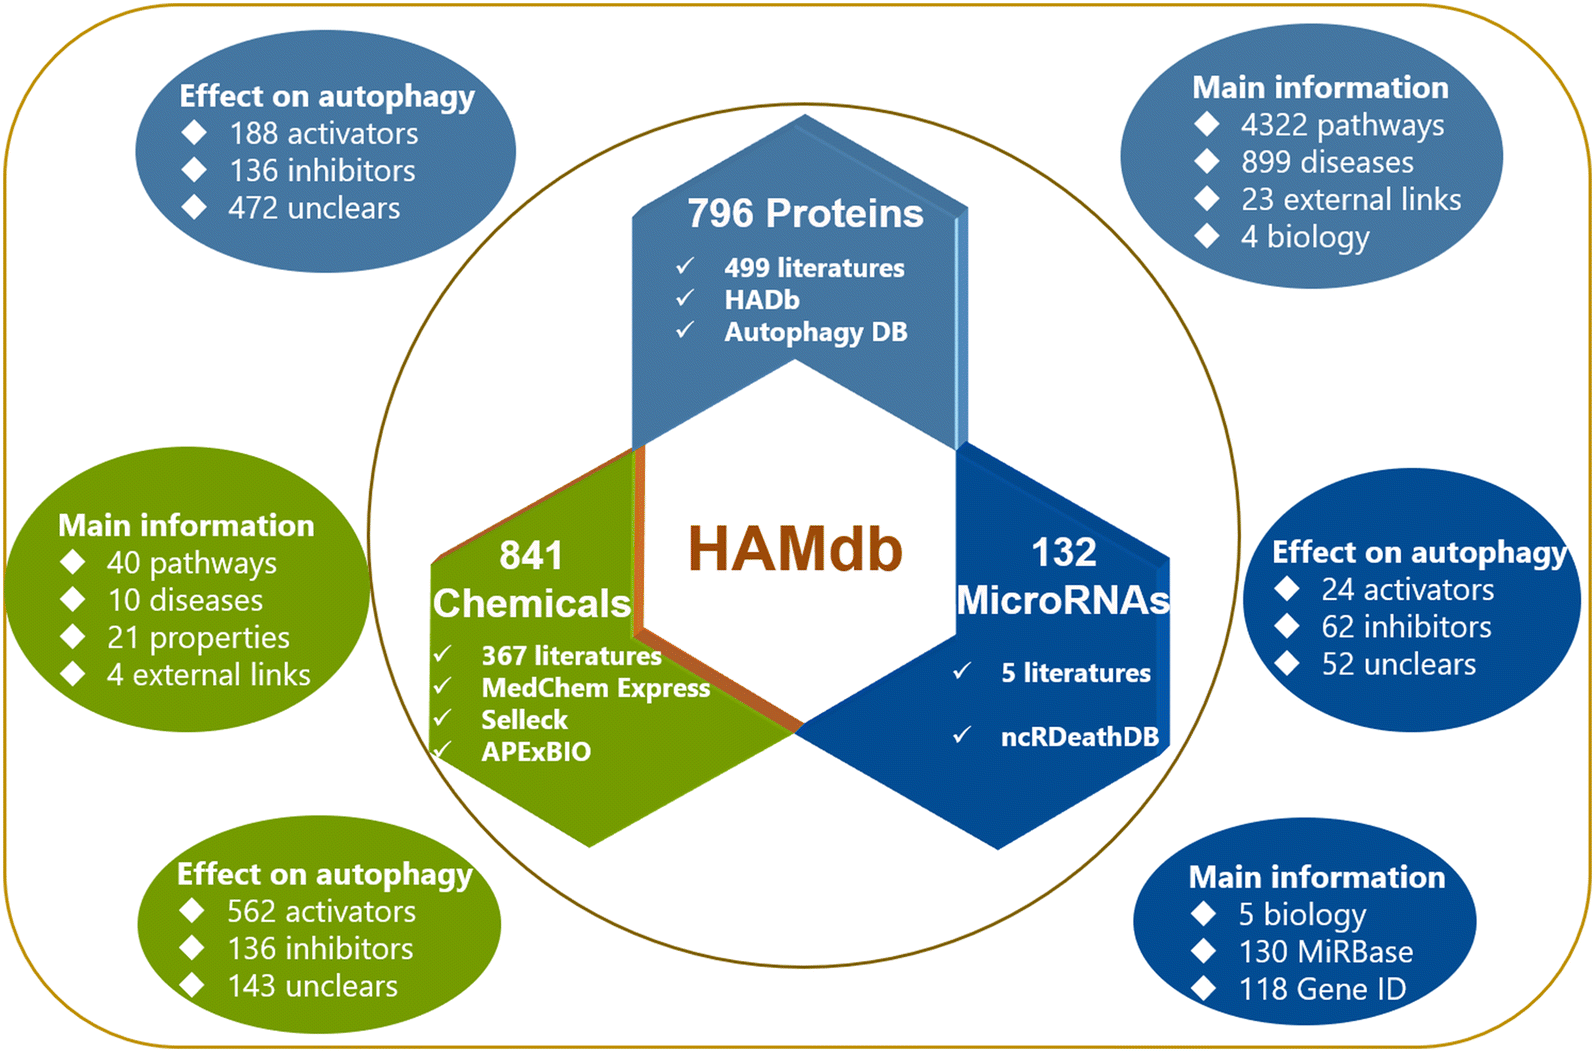 <br>
- From HAMdb, I will get information on **Uniprot ID , Symbol(gene_name), Alternative names ,and  organism.** <br>
- These information will be obtained from **protein-basic.csv** and **RNA-basic.csv**. The latter contains data about autophagy related microRNAs.<br>
- To get a better insight about the data involved of the HAMdb [visit this link](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0289-4)<br>
- Continue working on the linear algebra course.

As for the **Hela Spatial Proteome (HSP)**:<br>
- Spatial proteomics is a powerful method,with several approaches, to determine the subcellular localization of proteins (**dynamic organellar maps** is an approach that combines MS and fractionation techniques). <br>
- Since the localization of the protein affects its function, HSP mapped proteins in Hela cells according to their translocation events.<br>
- This database will be used to provide us by the **lysosomal markers**(from organellar markers tab), and the markers that are **predicted** to be in lysosomes depending on a certain prediction confidence and score (from Compact HSP tab). 

**Code explanation:**<br>
The following code was used to extract 4 fields from a previously downloaded csv file (protein-basic.csv).<br>
The csv file was an extreme mess, therefore I had to extract each field in a different way from each other.<br>
The alternative names were mixed with cells from other fields, therefore I had to put the contamination in a list and take the cells that are not part of this list.<br>
The code generated 4 files (TBU_Symbol, TBU_uniprot,TBU_alternative,TBU_homo) that were pasted and separated by the '|' as a delimiter to a file called **'TBU_protein-basic'**.

In [ ]:
#Get the features from protein-basic.csv
#TBU is an abbreviation to To Be Used and that's the form the contains the necessary info.
mylist=[]
uniprot_list = []
#junk list contains all the not-needed cells that were embedded in the alternative names (they were not alternative names)
junk_list= ['metastatic prostate cancer; primary prostate cancer', '1GAG;1I44;1IR3;1IRK;1P14;1RQQ;2AUH;2B4S;2HR7;2MFR;2Z8C;3BU3;3BU5;3BU6;3EKK;3EKN;3ETA;3W11;3W12;3W13;3W14;4IBM;4OGA;4XLV;4XSS;4XST;4ZXB;5E1S;5HHW;5J3H',
'2YS1', '1B8M;1BND', 'Ins1; LY294002; PI3K (complex); wortmannin; IGF1; PDPK1; Insulin; PTEN; INS; EGF; AKT1; Pdgf (complex); TNF; hydrogen peroxide; ILK', 'D-glucose; dexamethasone; REN; beta-estradiol; IL6; losartan potassium; AGT; candesartan; SB203580; Ins1; ACE; lipopolysaccharide; STAT3; Insulin; phorbol myristate acetate',
'advanced glycation end-products; HMGB1; TNF; advanced glycation endproducts-bovine serum albumin; APP; exenatide; GLP-1-(7-34)-amide; GCG; D-glucose; CRP; NFkB (complex); IL1B; PSEN1; AGER; S100B', '221040736;1034671294;46394126;56788407;158261143;553634;221045686;56788401;56788405;13129138;767958268;383875656;48762798;119608037;56788403;119608038;1034671292;46391586;56788399;48762794;46391582;52545786;15214282;48762796;383875657',
'hypertension']
#alter_list will be used to append all the alternative names (including alternative name #736 which will be removed from te list)
alter_list = []

#each file ('w') is used to include one field (ex Symbol, uniprot_ID, organism) these fields will be all pasted in bash.
with open('protein-basic.csv', 'r', encoding = 'latin1') as protein, open('TBU_Symbol', 'w') as output, open('TBU_uniprot', 'w') as out, open('TBU_homo', 'w') as out2:
    for line in protein:
        #The following line will be used to extract homo_sapiens from the splitted list
        line_homo = line.split(',')
        for element in line_homo:
            if element == 'Organism' or element == 'Homo sapiens (Human)':
                print(element, file= out2)
        #here I need to take the Symbol (index 0), but since some of them start with " , i need to remove it.
        Symb = line.split(',')[0]
        if not Symb.startswith('"'):
            print(Symb, file=output)
            Uniprot = line.split(',')[2]
            #it's appended to a list to replace the empty strings with 'nan'
            uniprot_list.append(Uniprot)
            uniprot_list = ["nan" if x == '' else x for x in uniprot_list]
    for element in uniprot_list:
        print(element, file = out)

#I used pandas to specify the delimiter in the output file (I didn't want commas)
df = pd.read_csv('protein-basic.csv', encoding = 'latin1')
outfile = 'protein_output'
df.to_csv(outfile,index=False, sep = '|')

with open('protein_output', 'r') as protein, open('alternative_output', 'w') as alt:
    for line in protein:
        line = line.split('|')
        if not line[5] in junk_list:
            print(line[5], file = alt)
with open('alternative_output','r') as tbu, open('TBU_alternative', 'w') as out:
    for line in tbu:
        line = line.rstrip()
        alter_list.append(line)
        alter_list = ["nan" if x == '' else x for x in alter_list]
    #remove element #736 which is a nan
    alter_list.pop(736)
    for element in alter_list:
        print(element, file = out)
#paste -d '|' TBU_Symbol TBU_uniprot TBU_alternative TBU_homo > TBU_protein-basic

In [ ]:
#Start parsing the RNA-basic.csv
#count =0
org_list = []
with open('RNA-basic.csv', 'r') as rna, open('TBU_rna1','w') as out, open('TBU_rna2','w') as output:
    for line in rna:
        line = line.split(',')
        #count+=1
        organism = line[5]
        #append to a list to replace the empty strings
        org_list.append(organism)
        org_list = ["nan" if x == '' else x for x in org_list]
        symbol = line[0]
        alternative = line[6]
        print(symbol, alternative, sep = "|", file = out)
    for element in org_list:
        print(element, file = output)
#paste -d "|" TBU_rna1 TBU_rna2 > TBU_rna      

In [ ]:
#Parsing the Hela Spacial proteome
#LFQdeep
gnames_list = []
protnames_list = []
df = pd.read_csv('LFQDeep.csv')
outfile = 'geneNames_output'
df.to_csv(outfile,index=False, sep = '|')
with open('geneNames_output', 'r') as gene, open('prot_Ids', 'w') as prot, open('protnames', 'w') as pnames, open('gnames', 'w') as gname:
    for line in gene:
        line= line.rstrip()
        line = line.split('|')
        gnames_list.append(line[3])
        gnames_list = ["nan" if x == '' else x for x in gnames_list]
        prot_Ids = line[0]
        print(prot_Ids, file = prot)
        prot_names = line[2]
        protnames_list.append(line[2])
        protnames_list = ["nan" if x == '' else x for x in protnames_list]
    for element in gnames_list:
        print(element, file = gname )
    for cell in protnames_list:
        print(cell, file = pnames)
        
paste -d '|' prot_Ids protnames gnames > TBU_LFQdeep    


#LFQFast
count = 0
df = pd.read_csv('LFQ_Fast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as lfq, open('TBU_LFQ_Fast', 'w') as out:
    for line in lfq:
        line= line.rstrip()
        line = line.split('|')
        prot_Ids = line[0]
        prot_names = line[2]
        gnames = line[3]
        print(prot_Ids, protnames,gnames, sep='|', file=out)


### April 22, 2020
### Tasks:
- Continue parsing Hela Spatial Proteome files to extract **protein ID, gene name, protein name**. <br>
- Continue the Linear Algebra lectures.

In [ ]:
#TMTDeep
count = 0
df = pd.read_csv('TMTDeep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open ('transitionfile.csv', 'r') as tmt, open('TBU_TMTdeep', 'w') as out:
    for line in tmt:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep='|', file=out)
        
#TMTFast
df = pd.read_csv('TMT_Fast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open ('transitionfile.csv', 'r') as tmt, open('TBU_TMTfast', 'w') as out:
    for line in tmt:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        print(prot_Ids, protnames,gname, sep='|', file=out)


In [ ]:
#DynamicSilac_deep
count= 0
df = pd.read_csv('DynamicSilac_deep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as dyn , open('TBU_DYNdeep', 'w') as out:
    for line in dyn:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep = '|', file = out)
        

In [ ]:
#Simulated_deep
count= 0
df = pd.read_csv('SimulatedDynamics_LFQdeep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as sim , open('TBU_SimulatedDyn_LFQdeep', 'w') as out:
    for line in sim:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep = '|', file = out)
        

#Simulated_fast
df = pd.read_csv('SimulatedDynamics_LFQFast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as sim , open('TBU_SimulatedDyn_LFQFast', 'w') as out:
    for line in sim:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        print(prot_Ids, protnames,gname, sep = '|', file = out)

In [ ]:
#Organellar markers
count = 0
df = pd.read_csv('Organellar_markers.csv')
outfile = 'transitionfile'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile', 'r') as org, open('TBU_organellar_markers','w') as out:
    #take the first line of the file. h stands for header
    first_line = org.readline()
    #print(first_line)
    hgene_name= first_line.split('|')[0]
    hprotein_name = first_line.split('|')[1]
    hprotein_ID = first_line.split('|')[2]
    hcompartmnet = first_line.split('|')[4]
    print(hgene_name,hprotein_name,hprotein_ID,hcompartmnet, sep = '|', file = out)
    for line in org:
        #I will only print to a the output file the lines that are related to lysosomes.
        #"lyososomes" and "Lysosomes" are not present in file
        if 'lysosome' in line or 'Lysosome' in line: 
            lysosome_line = line.rstrip()
            gene_lysosome = lysosome_line.split('|')[0]
            protname_lysosome = lysosome_line.split('|')[1]
            protId_lysosome = lysosome_line.split('|')[2]
            comp_lysosome = lysosome_line.split('|')[4]
            print(gene_lysosome,protname_lysosome,protId_lysosome,comp_lysosome, sep = '|', file = out)
            

#Compact HSP with prediction confidence
comp_list=[]
conf_list = []
df = pd.read_csv('Compact_Hela_proteome.csv')
outfile = 'transitionfile'
df.to_csv(outfile,index=False, sep = '|') 
with open('transitionfile', 'r') as org, open('TBU_compact_HSP','w') as out, open('first_cols', 'w') as out2, open('compfile', 'w') as output, open('conffile', 'w') as output2:
    first_line = org.readline()
    hgene_name= first_line.split('|')[0]
    hprotein_ID = first_line.split('|')[1]
    hprotein_name = first_line.split('|')[2]
    hcompartmnet = first_line.split('|')[7]
    hconfidence = first_line.split('|')[8]
    print(hgene_name,hprotein_name,hprotein_ID,hcompartmnet,hconfidence, sep = '|', file = out)

    for line in org:
        if 'lysosome' in line or 'Lysosome' in line: 
            lysosome_line = line.rstrip()
            gene_lysosome = lysosome_line.split('|')[0]
            protId_lysosome = lysosome_line.split('|')[1]
            protname_lysosome = lysosome_line.split('|')[2]
            print(gene_lysosome, protId_lysosome, protname_lysosome, sep = '|', file = out2)
            comp_lysosome = lysosome_line.split('|')[7]
            conf_lysosome = lysosome_line.split('|')[8]
            comp_list.append(comp_lysosome)
            comp_list = ["nan" if x == '' else x for x in comp_list]
            conf_list.append(conf_lysosome)
            conf_list = ['nan' if x == '' else x for x in conf_list]
    for element in comp_list:
        print(element, file = output)
    for element in conf_list:
        print(element, file = output2)
            
#paste -d '|' first_cols compfile conffile >datafile
#cat TBU_compact_HSP datafile > TBU_compact-HSP
       

### April 23, 2020
### Tasks:
- Start parsing the BCL2 database. Note that I have ready tables somehow from previous steps so I just need to specify the required columns from each of BCL2_table.csv, BID_table.csv, BAX_table.csv **(i.e. Gene name, Protein name, Synonyms)**. <br> I will do that on bash because it's easier in this case and can be done with just one line of code.
- It seems like I will download the non-BCL2 homologous proteins that share BH3 motif. They are important in apoptosis and cell death as well. 
- Work on extracting info from yCellDeath database .

#### BCL2DB, is a collection of sequence, structural and functional information about BCL-2 homologous and BH3-containing proteins.<br>
Discovery of the BCL-2 gene defined a new class of proto-oncogenes that block cell death without enhancing cell proliferation. **IT'S IMPORTANT TO NOTE THAT** BCL-2 homologous proteins share a similar α-helical bundle fold (the BCL-2 domain), have up to four different BH motifs (BH1-BH4), and can be either anti-apoptotic (e.g., BCL-2 and BCL-xL) or pro-apoptotic (e.g., BAX, BAK and BID). All the other (non-BCL-2 homologous) proteins possessing a functional BH3 motif are pro-apoptotic (such as the BH3-only member BIM or the BH3 motif-containing protein Atg12).


In [ ]:
cat BCL2_table.csv | cut -d ',' -f1,2,3 > TBU_BCL2.csv
cat BAX_table.csv | cut -d ',' -f1,2,3 > TBU_BAX.csv
cat BID_table.csv | cut -d ',' -f1,2,3 > TBU_BID.csv
cat otherCellularHomologs_table.csv | cut -d ',' -f1,2,3 > TBU_othercellularHomologs.csv

In [ ]:
#Downloading the classical proteins from BH3 motif
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBBH3only'
wget.download(url, 'BCL2DBBH3only')

In [ ]:
import bs4
from bs4 import BeautifulSoup
list_head = []
list_rows= []
with open('BCL2DBBH3only') as html_file, open('TBU_BH3_classical.csv', 'w') as out:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table', class_="tnomenclature")
    #to check how many tables are there in the site
    #len(table) #1
    #table[0] 
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            list_head.append(head.text)
        for cell in row.find_all('td'):
            list_rows.append(cell.text.replace(',', '|'))
    #remove 'primary function'
    list_head.pop(3)
    #remove references
    list_head = list_head[:-1]
    header = ",".join(list_head)
    print(header, file = out)
    tuples = list(zip(*[iter(list_rows)]*6)) 
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        #this will remove last element of the tuple (i.e. references)
        tup = tup[:-1]
        #this will print the first 3 element of the tuple and the last element (i.e. accession number)
        print(','.join(tup[:3]+tup[-1:]), file = out)

In [ ]:
#Downloading other proteins with BH3 motif
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBOtherBH3'
wget.download(url, 'BCL2DBOtherBH3')

In [ ]:
list_rows = []
list_head = []
with open('BCL2DBOtherBH3') as html_file, open('TBU_BH3_other.csv', 'w') as out:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table', class_="tnomenclature")
    #len(table) #1
    #table[0]
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            list_head.append(head.text)
        for cell in row.find_all('td'):
            list_rows.append(cell.text.replace(',', '|'))
    #remove 'primary function'
    list_head.pop(3)
    #remove references
    list_head = list_head[:-1]
    header = ",".join(list_head)
    print(header, file = out)
    tuples = list(zip(*[iter(list_rows)]*6)) 
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup[:3]+tup[-1:]), file = out)





#### Note that HumanAutophagydatabase was parsed at earlier steps and information about GeneId, Name, Symbol are available.

In [ ]:
count =0
alias_list = []
with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_file, open('TBU_yApop.csv', 'w') as out:
    first_line = csv_file.readline()
    #list the header
    first_line = first_line.rstrip().split(',')
    #print specific elements
    print(first_line[1], first_line[4], first_line[2], sep = ',', file = out)
    with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_new, open('geneuniprot','w') as gp,open('alias', 'w') as alias:
        csv_reader = csv.DictReader(csv_new)
        for line in csv_reader:
            gene_name = line['gene_name']
            uniprot = line['uniprot']
            print(gene_name,uniprot, sep = ',', file = gp)
            gene_alias = line['gene_alias']
            alias_list.append(gene_alias.replace('\xa0',''))
            alias_list = ['nan' if x == '' else x for x in alias_list]
        for element in alias_list:
            print(element, file = alias)
            
#paste -d ',' geneuniprot alias > gp_alias.csv
#cat TBU_yApop.csv gp_alias.csv > TBU_yApoptosis.csv

### April 24, 2020
### Tasks:
- Continue extracting information from databases. Start with **HumanLysosomeGene database**(hLGDB collects information about human lysosomal genes and their transcriptional regulation such as transcription factor EB (TFEB) binding sites and miRNAs). It is the first resource that provides a comprehensive and accessible census of the human genes belonging to the lysosomal system. They collected and annotated genes from different resources.<br>
- Meeting with Sonja to discuss the project.<br>
- Extract information from **CASBAH database**. (caspases are proteins that coordinate apoptosis. They are the major effectors of programmed cell death. CASBAH contains information about all the currently known caspase substrates).<br>
- Extract information from **Deathbase database**(Deathbase is a database of proteins involved in cell death. It compiles relevant data on the function, structure and evolution of proteins involved in apoptosis and other forms of cell death in several organisms).

### Meeting's Summary
- Create combined list of lysosomes, cell death and autophagy genes that downloaded and extracted from different databases.<br>
- Compare the list above to the list of genes from the screens.<br>
- Sonja will send me the screens and I will take the genes that have at least 20% reduction of cell count to check whether this reduction was due to any of the 3 mechanisms or it's any other culture problem.<br>
- By gene knock down, we can see if the gene is affecting the cell count or not &#8594; check if the cause is cell death, lysosomes or autophagy.<br>
- One good article to cite is [Cell Painting](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5223290/).

In [ ]:
#parsing HumanLysosomeGene DB
count = 0
symbol_list =[]
with open('HumanLysosomeGene_table', 'r') as table, open ('symbol', 'w') as symb, open('name','w' ) as nam:
    for line in table:
        line=line.rstrip()
        line=line.split(';')
        symbol = line[0]
        name = line[1]
        print(name, file = nam)
        symbol_list.append(symbol)
        #some references are printed with the name creating an empty line in the list of symbols. 
        #replace the empty line with nan (this will be eliminated at later steps)
        symbol_list = ['nan' if x == '' else x for x in symbol_list]
    for element in symbol_list:
            print(element, file = symb)
with open('prefinal_HLG', 'r') as pre, open ('TBU_HumanLysosomeGene_DB', 'w') as tbu:
    for line in pre:
        line= line.rstrip()
        if not line.startswith('nan'):
            print(line,file = tbu)

**The Full_CASBAH_table.csv has info about the organisms but they were not added to TBU_CASBAH.csv because there was no clear way to cut them out. So, Full_CASBAH_table.csv can be used as a reference for organisms if needed.**

In [1]:
with open('Full_CASBAH_table.csv', 'r') as full, open('TBU_CASBAH.csv', 'w') as out:
    for line in full:
        line = line.rstrip()
        line=line.split(',')
        name = line[0]
        pre_uniprot = line[1]
        uniprot = pre_uniprot.split('_')[0]
        synonym = line[2]
        print(name,uniprot,synonym, sep = ',',file = out)

In [ ]:
#Parsing Death_base DB
#The delimiter in this database in not recognized so I will get the fields with bash commands and combine them.
#Start with protein_list.txt

cat protein_list.txt | cut -f1 > ext_ID
cat protein_list.txt | cut -f2 > synonyms
cat protein_list.txt | cut -f3 > organism
cat protein_list.txt | cut -f4 > uniprotID

paste -d ';' ext_ID synonyms organism uniprotID > TBU_Deathbase_proteins
#wc -l 218


#Continue with apoptosis_list.txt
cat apoptosis_list.txt | cut -f2 > extapop_ID
cat apoptosis_list.txt | cut -f3 >org_apop
cat apoptosis_list.txt | cut -f4 > synonyms_apop

#remove the empty lines from the synonyms list.
count = 0
syn_list = []
with open('synonyms_apop', 'r') as syn, open('synonyms_out', 'w') as out:
    for line in syn:
        line = line.rstrip()
        syn_list.append(line)
        syn_list = ['nan' if x == '' else x for x in syn_list]
    for element in syn_list:
        print(element, file = out)


paste -d ';' extapop_ID synonyms_out org_apop > TBU_Deathbase_apoptosis

### April 25, 2020
### Tasks:
- Parse the **proteinAtlasLysosome.xml** to get info on **gene name,synonyms,uniprot_ID** (an atlas of protein encoding genes. It maps all human proteins in cells.<br>
- Parse **GO database**.
- Continue the linear algebra course.


In [ ]:
#Parsing proteinAtlasLysosome.xml. I could have used .tsv file, but xml is more fun to parse.
count = 0
myDict = {} # will hold gene name and synonyms
mylist = [] # will hold synonyms
myDict2 = {} #will hold gene name and uniprot IDs
mylist2 = [] #will hold uniprot Ids
with open('proteinAtlasLysosome.xml', 'r') as xml, open('gene_syn','w') as out, open('gene_uni', 'w') as output:
    for line in xml:
        line = line.rstrip()
        if '<name>' in line:
            line = line.split('<')[1]
            #get the gene_name
            gene_name = line.split('>')[1]
            #empty the list from the previous synonym to append a new one.
            mylist=[]
            mylist2=[]
            #some gene names do not have synonyms so I replace the synonym space with 'nan'. If I don't write this line, the gene names that do not have synonyms won't be added to myDict.
            myDict[gene_name] = 'nan'
            #same for uniprot IDs
            myDict2[gene_name] = 'nan'
        elif '<synonym>' in line:
            line = line.split('<')[1]
            pre_syn = line.split('>')[1]
            synonym= pre_syn.split('<')[0]
            #mylist is where I will store synonyms 
            mylist.append(synonym)
            #since one gene_name can have multiple synonyms so I have to join mylist for each synonyms set
            synonyms = ','.join(mylist)
            #store the synonyms for each gene_name
            myDict[gene_name] = synonyms        
        elif 'Uniprot' in line:
            pre_uni = line.split(' ')[1]
            uniprot = line.split('"')[1]
            #some gene names have more that 1 uniprot ID
            mylist2.append(uniprot)
            uniprot_IDs = ','.join(mylist2)
            myDict2[gene_name] = uniprot_IDs
    for key,value in myDict2.items(): # I could have said print(value) since I only want the uniprot. But that's for sanity check.
        print(key,value,sep = ';', file = output)
    #print them in this from:SNAPIN;BLOC1S7,BORCS3,SNAPAP
    for key,value in myDict.items():
        print(key,value,sep = ';', file = out)

####continue the rest of the code on bash####:
# echo 'gene_name' 'synonym' 'Uniprot' | tr ' ' ';' > headers
# cat gene_uni | cut -d ';' -f2 > uniIds
# paste -d ';' gene_syn uniIds > proteinAtlasFile
# cat headers proteinAtlasFile > TBU_proteinAtlasLysosome

**The code below takes an almost an hour to finish because goa_uniprot_all.gaf is huge!**

In [ ]:
list_autophagy = ['autophagy', 'Autophagy', 'autophagosome', 'Autophagosome',"autophagocytosis",'Autophagocytosis']
list_lysosomes = ['lysosome', 'Lysosome', 'Lysosomes', 'Lysosome', 'lysosomal', 'Lysosomal']
list_cellDeath = ['cell death', 'Cell Death','apoptosis', 'Apoptosis', 'programmed', 'Programmed']

with open('goa_uniprot_all.gaf', 'r') as goa, open('autophagy_lines','w') as auto,open('lysosome_lines','w') as lys, open('cellD_lines','w') as cell:
    for line in goa:
        line=line.rstrip()
    for element in list_autophagy:
        if element in line:
            print(line, file = auto)
    for keyword in list_lysosomes:
        if keyword in line:
            print(line, file = lys)
    for vocab in list_cellDeath:
        if vocab in line:
            print(line,file=cell)

In [ ]:
#I want the ones with unique uniprot IDs (no need for repitition)
set1 = set()
with open('autophagy_lines','r') as auto, open('TBU_autophagy','w') as out:
    for line in auto:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        #this can be also done using nested dictionaries (it will take unique key-value pairs)
        #create a frozenset inside the big set
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set1:
            #If the line is in the set continue to the next line, if not then print it
            continue
        else:
            #this is to print the first line of the file
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            #add it to frozenset to avoid duplicates
            set1.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))

#echo 'Uniprot_ID' 'Symbol' 'DB_Object_name' 'Synonym' | tr ' ' ';' > headers
#cat headers TBU-autophagy > TBU_autophagy

### April 26, 2020
### Tasks:
- continue the two other files (lysosome_lines and cellD_lines).
- Get info from downloaded amigo files(separate files to Uniprot_IDs and Non Uniprot_IDs).
- Get info from **The_HumanAutophagy_database**.
- Upload to github (including downloaded files).

In [ ]:
set2 = set()
with open('autophagy_lines','r') as auto, open('TBU-autophagy','w') as out:
    for line in auto:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set2:
            continue
        else:
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            set2.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))
            
#cat headers TBU_lysosomes > TBU_lysosome

In [ ]:
set3 = set()
with open('cellD_lines','r') as cell, open('TBU-cellDeath','w') as out:
    for line in cell:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set3:
            continue
        else:
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            set3.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))
            
#cat headers TBU-cellDeath > TBU_cellDeath

In [ ]:
#Parse Amigo downloaded data 
#Start with Amigo_lysosome data
synonym_uni = []
synonym_oth = []
with open('AmiGo_lysosome_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)

#echo 'Uniprot_ID' 'gene/product_name' 'Synonyms' 'Organism' | tr ' ' ';' > headers
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_lysosome
#cat headers pre_TBU_Uniprot_Amigo_lysosome > TBU_Uniprot_Amigo_lysosome


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_lysosome
#cat headers pre_TBU_otherDB_Amigo_lysosome > TBU_otherDB_Amigo_lysosome

In [ ]:
#Amigo_autophagy data
synonym_uni = []
synonym_oth = []
with open('AmiGo_autophagy_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)
        
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_autophagy
#cat headers pre_TBU_Uniprot_Amigo_autophagy > TBU_Uniprot_Amigo_autophagy


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_autophagy
#cat headers pre_TBU_otherDB_Amigo_autophagy > TBU_otherDB_Amigo_autophagy

In [ ]:
synonym_uni = []
synonym_oth = []
with open('AmiGo_cellDeath_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)
        
        
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_cellDeath
#cat headers pre_TBU_Uniprot_Amigo_cellDeath > TBU_Uniprot_Amigo_cellDeath


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_cellDeath
#cat headers pre_TBU_otherDB_Amigo_cellDeath > TBU_otherDB_Amigo_cellDeath


In [ ]:
#get info from The_Human_autophagy_database
with open('atg_genes_detail.dat','r') as atg, open('TBU_TheAutophagyDB.csv', 'w') as out:
    for line in atg:
        line = line.rstrip()
        line=line.split('\t')
        symbol = line[2]
        synonym = line[7]
        name = line[10]
        uniprot_ID = line[18]
        print(uniprot_ID, symbol, synonym, name , sep = ',', file = out)